In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [307]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [308]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [309]:
df.shape

(13200, 7)

Detecting the outliers and remove it using different methods

##  1.MEAN METHOD

In [310]:
df.price_per_sqft.min()

267

In [311]:
df.price_per_sqft.max()

12000000

In [312]:
# To find mean of price_per_sqft column
df.price_per_sqft.mean()

7920.336742424242

In [313]:
# To find median of price_per_sqft column
df.price_per_sqft.median()

5438.0

There is a significant difference between mean and median. Indicating presence of outliers.

C:\Users\risha\AppData\Local\Temp\ipykernel_19664\2939225295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

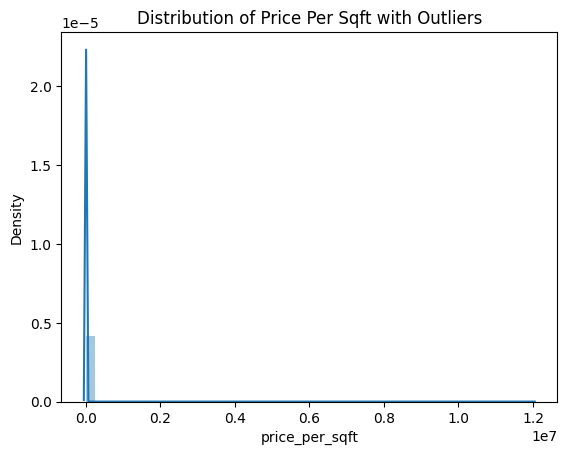

In [314]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of Price Per Sqft with Outliers')

<Axes: ylabel='price_per_sqft'>

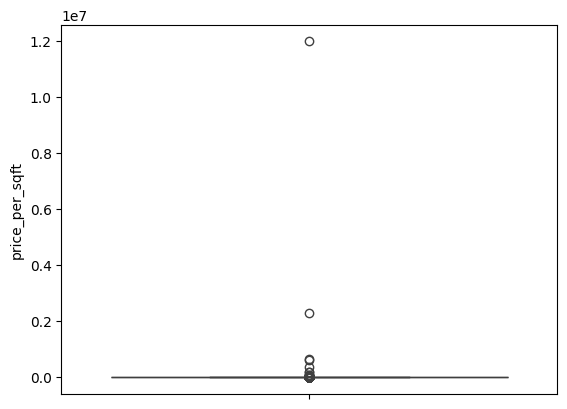

In [315]:
sns.boxplot(df['price_per_sqft'])

In [316]:
# quantile() to find out percentiles
df.price_per_sqft.quantile([0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.95,0.96,0.97,0.98,0.99])

0.10     3500.00
0.25     4267.00
0.50     5438.00
0.75     7317.00
0.90    11666.00
0.92    12857.00
0.94    14394.80
0.95    15312.10
0.96    16500.00
0.97    17857.00
0.98    20000.00
0.99    23674.45
Name: price_per_sqft, dtype: float64

In [317]:
# There is a significant variation between 98th & 99th percentile, Indicating presence of outliers. 
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)] #outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [318]:
# data without outliers. 
new_df=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)] 
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\755420803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft without Outliers')

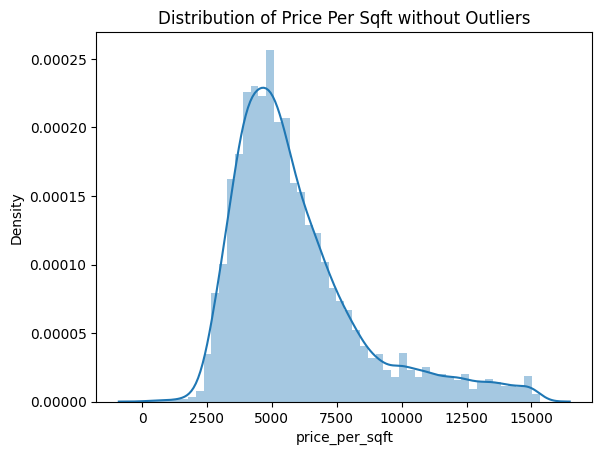

In [319]:
sns.distplot(new_df['price_per_sqft'])
plt.title('Distribution of Price Per Sqft without Outliers')

<Axes: ylabel='price_per_sqft'>

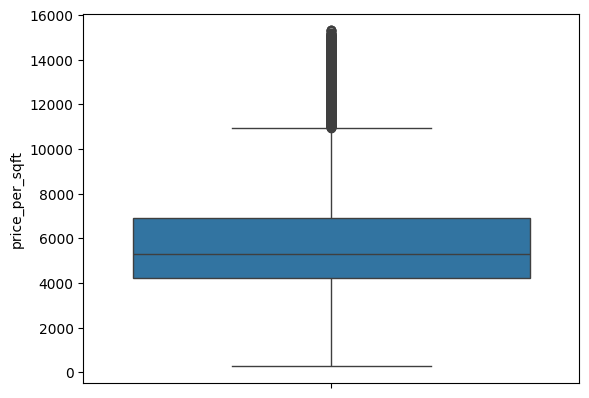

In [320]:
sns.boxplot(new_df['price_per_sqft'])

In [321]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(new_df))
print("Outliers:",len(df)-len(new_df))

Before Removing Outliers: 13200
After Removing Outliers: 12540
Outliers: 660


After removing outliers using the mean function, we have almost achieved a bell curve in the distplot, and we have removed 274 outliers from the dataset.

## 2.PERCENTILE METHOD

In [322]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [323]:
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15312.099999999984
Lower Limit: 3107.8500000000004


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\2939225295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

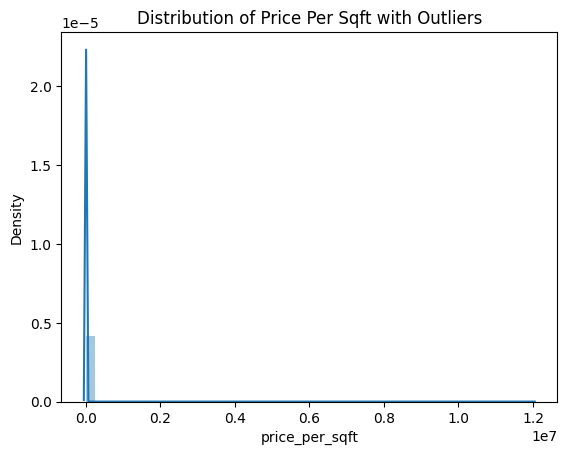

In [324]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of Price Per Sqft with Outliers')

<Axes: ylabel='price_per_sqft'>

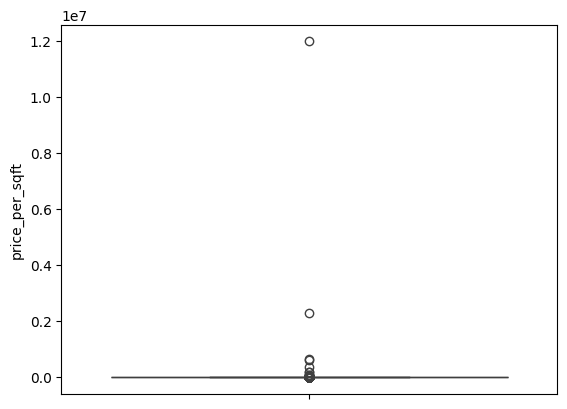

In [325]:
sns.boxplot(df['price_per_sqft'])

In [326]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [327]:
#trimming or delete the outlier data
new_df1=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']<=upper_limit)]
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(new_df1))
print("Outliers:",len(df)-len(new_df1))

Before Removing Outliers: 13200
After Removing Outliers: 12540
Outliers: 660


In [328]:
new_df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\2110943172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft without Outliers')

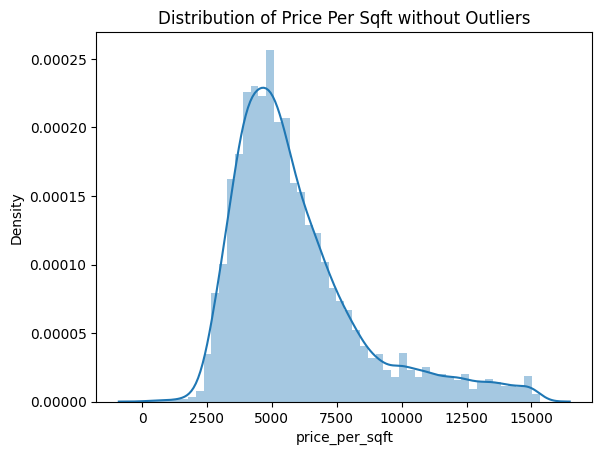

In [329]:
sns.distplot(new_df1['price_per_sqft'])
plt.title('Distribution of Price Per Sqft without Outliers')

<Axes: ylabel='price_per_sqft'>

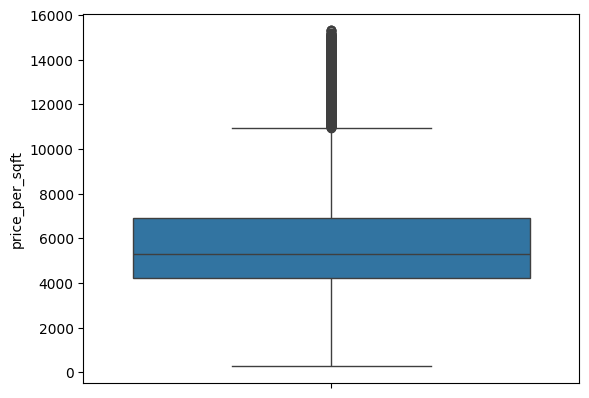

In [330]:
sns.boxplot(new_df1['price_per_sqft'])

Upon applying the percentile technique to remove outliers, we nearly achieved a bell curve in the distplot, successfully eliminating 660 outliers from the dataset.

In [331]:
#capping- change the outlier to upper or lower limit values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\risha\AppData\Local\Temp\ipykernel_19664\4033903960.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

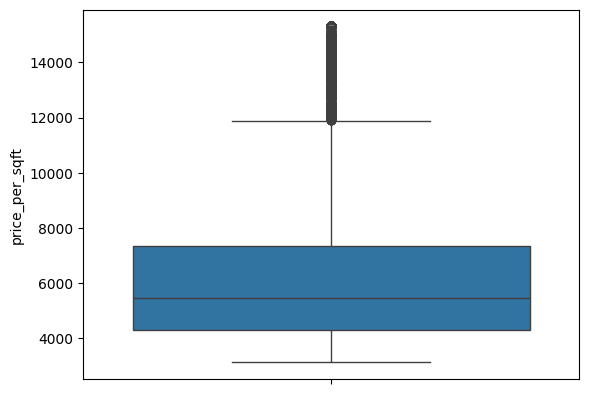

In [332]:
sns.boxplot(new_df2['price_per_sqft'])

## 3.IQR METHOD

C:\Users\risha\AppData\Local\Temp\ipykernel_19664\2939225295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

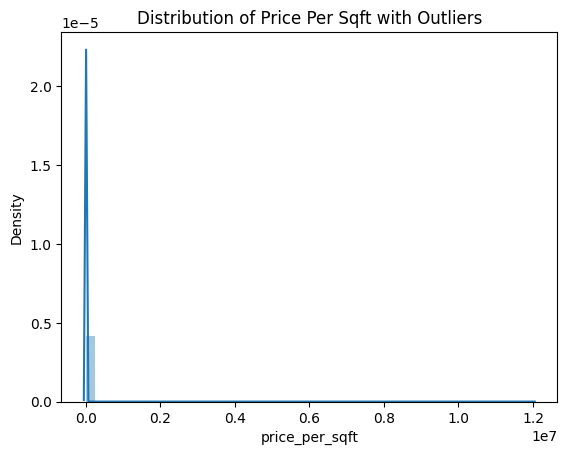

In [333]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of Price Per Sqft with Outliers')

<Axes: ylabel='price_per_sqft'>

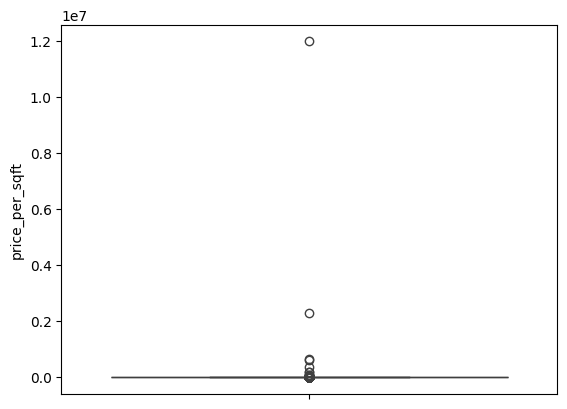

In [334]:
sns.boxplot(df['price_per_sqft'])

In [335]:
q1=df.price_per_sqft.quantile(0.25)
q3=df.price_per_sqft.quantile(0.75)
IQR=q3-q1
print("q1=",q1)
print("q3=",q3)
print("IQR=",IQR)

q1= 4267.0
q3= 7317.0
IQR= 3050.0


In [336]:
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
print("Lower_Whisker=",lower_whisker)
print("Upper_Whisker=",upper_whisker)

Lower_Whisker= -308.0
Upper_Whisker= 11892.0


In [337]:
#finding outliers
df[(df.price_per_sqft<-308) | (df.price_per_sqft>11892)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [338]:
#df without outliers
df_new=df[(df.price_per_sqft>-308) & (df.price_per_sqft<11892)]
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [339]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df_new))
print("Outliers:",len(df)-len(df_new))

Before Removing Outliers: 13200
After Removing Outliers: 11935
Outliers: 1265


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\3734360437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of Price Per Sqft without Outliers')

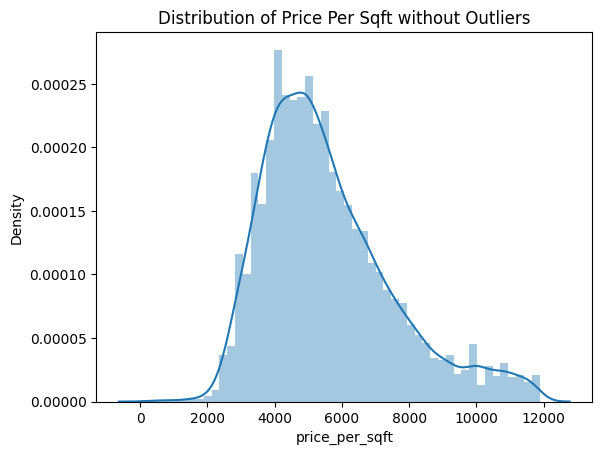

In [340]:
sns.distplot(df_new['price_per_sqft'])
plt.title('Distribution of Price Per Sqft without Outliers')

<Axes: ylabel='price_per_sqft'>

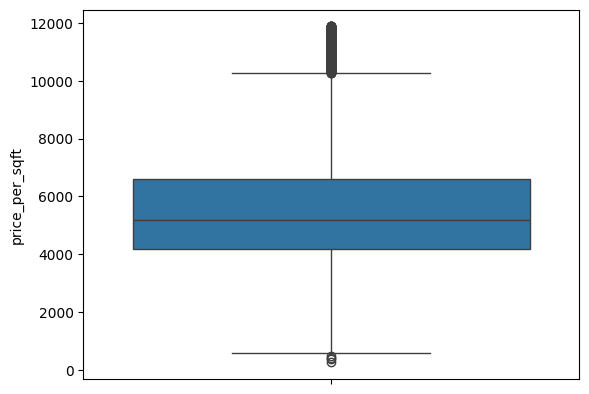

In [341]:
sns.boxplot(df_new['price_per_sqft'])

Using the IQR method to eliminate outliers, we approached a bell curve in the distplot and removed a total of 1265 outliers from the dataset.

## 4.NORMAL DISTRIBUTION

In [342]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [343]:
m=df.price_per_sqft.mean()
m

7920.336742424242

In [344]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [345]:
#-3sigma
m-3*s

-312261.14424190175

In [346]:
# +3sigma
m+3*s

328101.8177267502

In [347]:
#finding outliers
df[(df.price_per_sqft<-312261) | (df.price_per_sqft>328101)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [348]:
#data without outliers
dframe=df[(df.price_per_sqft>-312261) & (df.price_per_sqft<328101)]
dframe

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [349]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(dframe))
print("Outliers:",len(df)-len(dframe))

Before Removing Outliers: 13200
After Removing Outliers: 13195
Outliers: 5


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\4183192451.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dframe['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

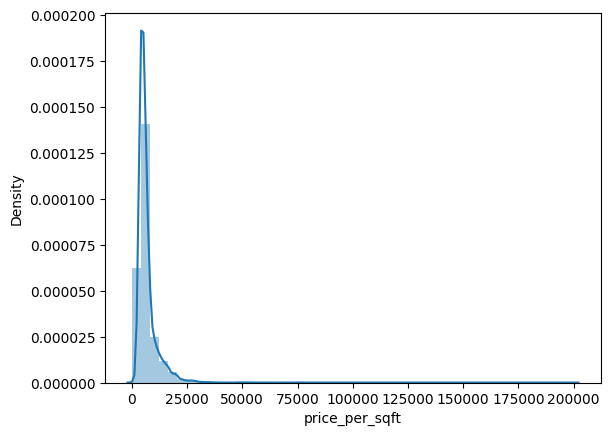

In [350]:
sns.distplot(dframe['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

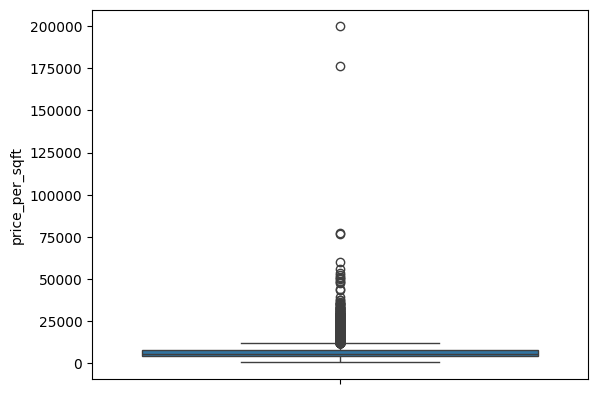

In [351]:
sns.boxplot(dframe['price_per_sqft'])


Using the normal method, before removing outliers, there were 13,200 data rows. After removing outliers, there were 13,195 data rows, with 5 outliers identified.

## 5.ZSCORE METHOD

In [352]:
m=df.price_per_sqft.mean()
m

7920.336742424242

In [353]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [354]:
lower_limit=m-3*s
lower_limit

-312261.14424190175

In [355]:
upper_limit=m+3*s
upper_limit

328101.8177267502

In [356]:
#data without outliers
df4=df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [357]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before Removing Outliers: 13200
After Removing Outliers: 13195
Outliers: 5


C:\Users\risha\AppData\Local\Temp\ipykernel_19664\27540472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

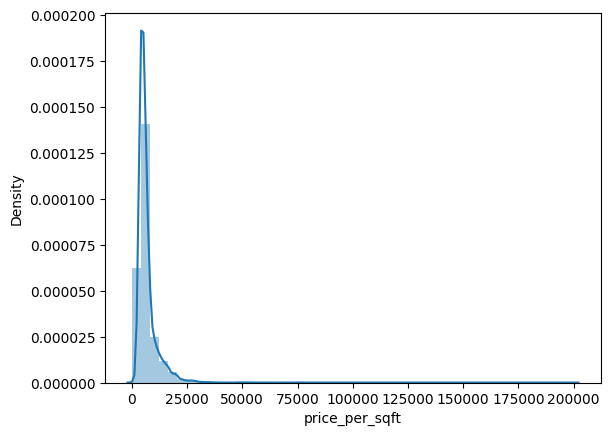

In [358]:
sns.distplot(df4['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

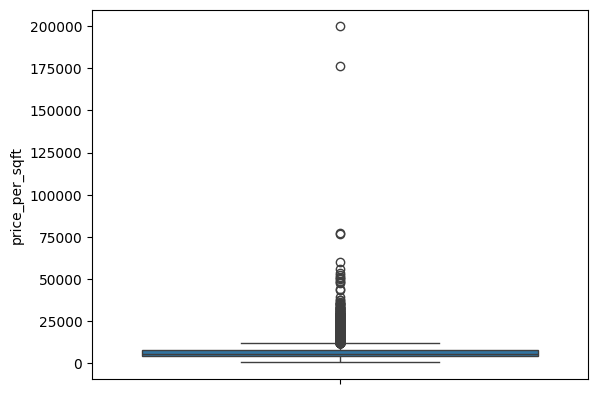

In [359]:
sns.boxplot(df4['price_per_sqft'])

using the zscore method, there were 13,200 data rows before removing outliers, and 13,195 data rows after removal, indicating a total of 5 outliers.

We identified the same outliers using both the normal distribution and z-score method, indicating same process in our outlier removal approach.

In [360]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [361]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [362]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()

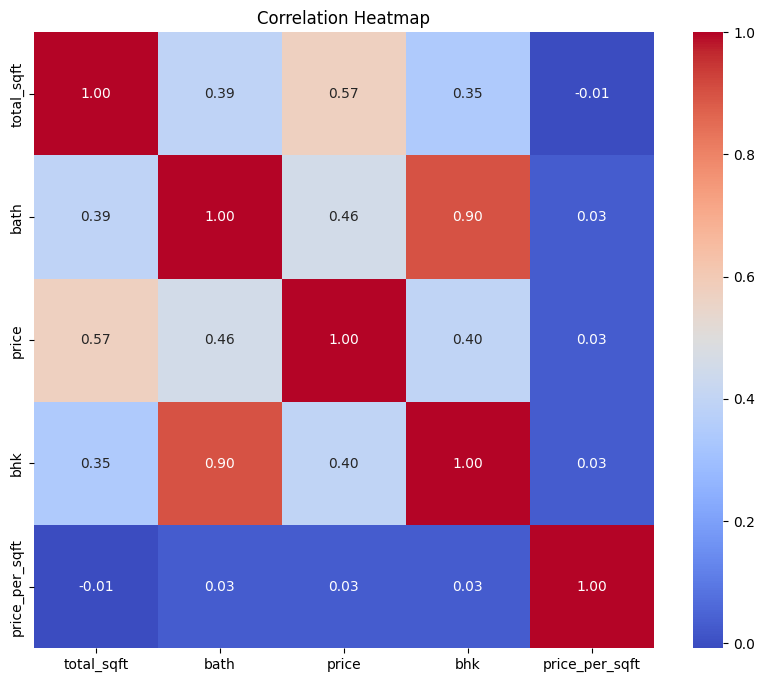

In [363]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#plot scatterplot
sns.pairplot(df)
plt.show()